In [33]:
#Felipe Cremonesi, Kaique Salandim, Vinícius Jabara
#Baixando o arquivo csv dos valores de dogecoin pelo Drive
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1ZC_AEwdQOQQW4wQ-usWtgGiw4sXqoDOx',
                                    dest_path='./DOGE-USD.csv')

import pandas as pd
import matplotlib.pyplot as plt

#Dados de 01-01-2021 até 24-06-2023 em Dollar
#Análise Exploratória de Dados
df = pd.read_csv("DOGE-USD.csv", header=0, sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515
1,2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680
2,2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608
3,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979
4,2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,687256067
...,...,...,...,...,...,...,...
900,2023-06-20,0.062343,0.063057,0.060911,0.063045,0.063045,190107977
901,2023-06-21,0.063045,0.066470,0.062965,0.065704,0.065704,370299722
902,2023-06-22,0.065696,0.069006,0.065550,0.065643,0.065643,406178282
903,2023-06-23,0.065640,0.069663,0.065534,0.068174,0.068174,319058221


In [34]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,905.000000,905.000000,905.000000,905.000000,905.000000,9.050000e+02
mean,0.137059,0.144593,0.129802,0.137149,0.137149,2.118115e+09
std,0.100517,0.110365,0.090835,0.100555,0.100555,4.773391e+09
min,0.004681,0.005685,0.004615,0.005685,0.005685,1.120492e+08
25%,0.069082,0.071109,0.067003,0.069094,0.069094,4.164880e+08
50%,0.088223,0.091515,0.084771,0.088208,0.088208,8.220922e+08
75%,0.190480,0.200840,0.180786,0.190020,0.190020,1.789638e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


<Axes: xlabel='Date'>

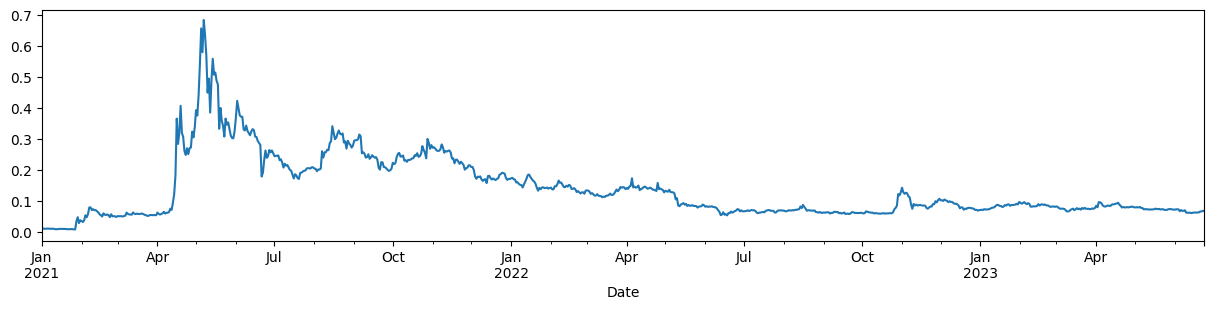

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df['Close'].plot(figsize=(15,3))

<Axes: xlabel='Date'>

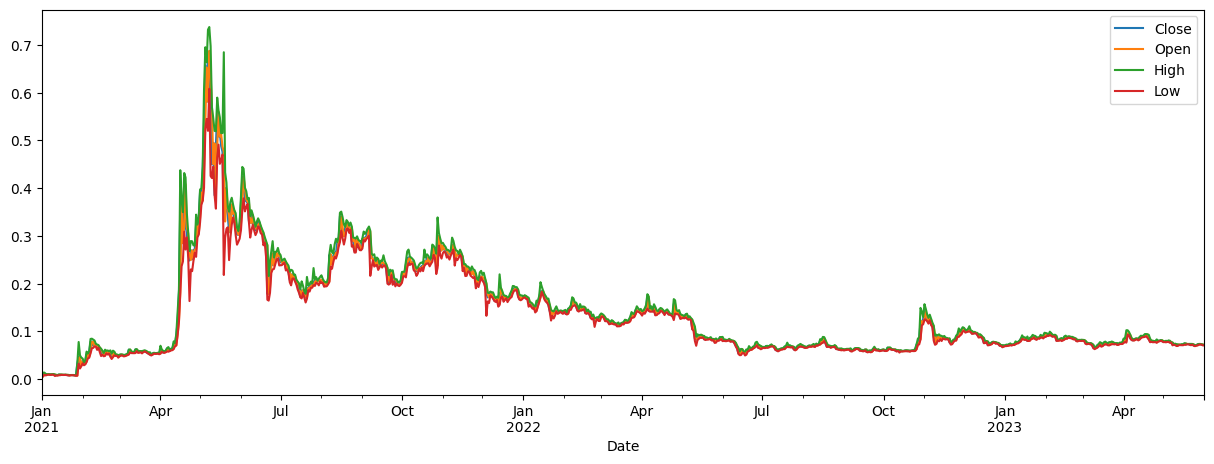

In [36]:
#Velas no gráfico
df[['Close', 'Open', 'High', 'Low']]['01-01-2021':'06-01-2023'].plot(figsize=(15,5))

<Axes: xlabel='Date'>

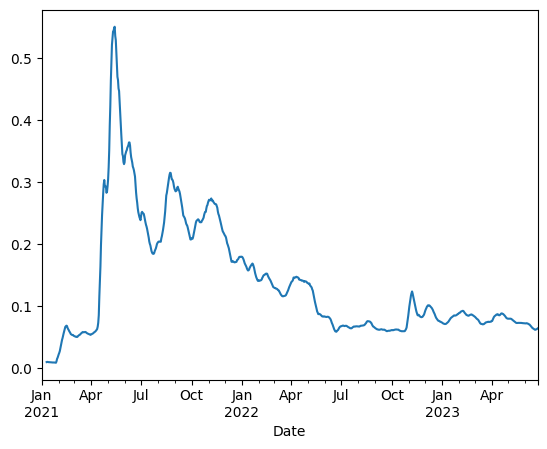

In [37]:
#Médias Móveis
df['MA10'] = df['Close'].rolling(10).mean()
#MA 20 CLOSE
df['MA50'] = df['Close'].rolling(50).mean()
#MA 30 CLOSE
df['MA100'] = df['Close'].rolling(100).mean()

df['MA10'].plot()

<Axes: xlabel='Date'>

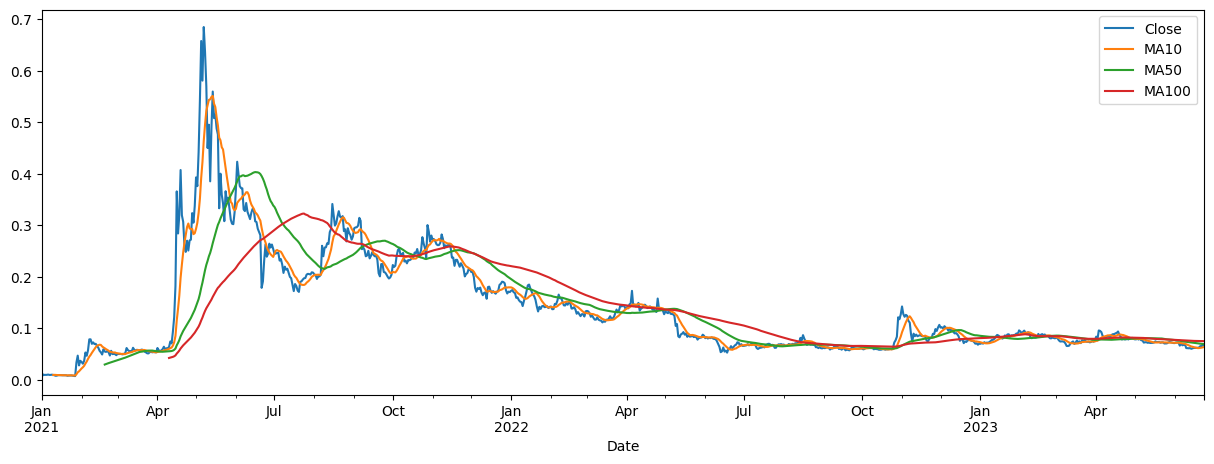

In [38]:
df[["Close",'MA10', 'MA50', 'MA100']].plot(figsize = (15,5))

<Axes: xlabel='Date'>

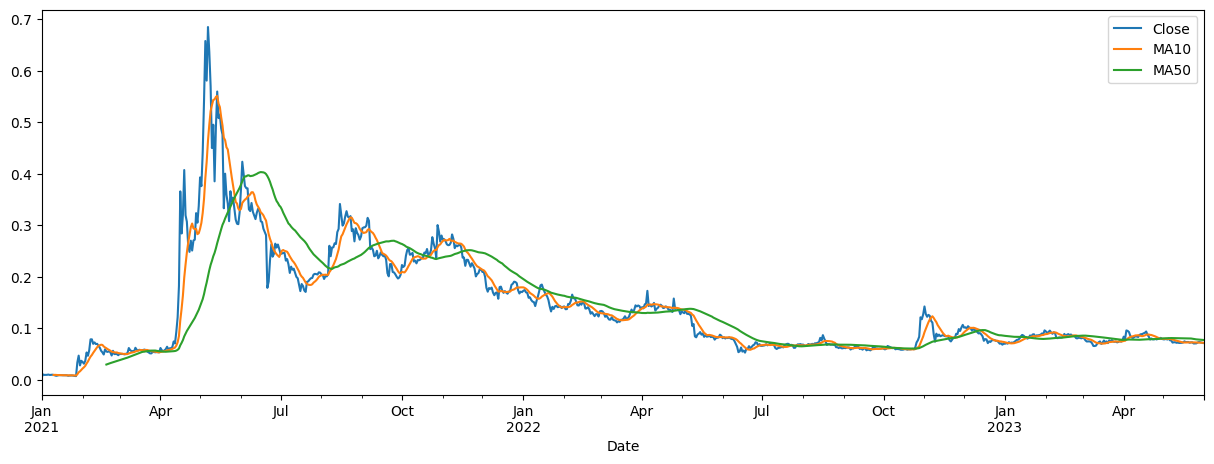

In [39]:
#Cruzamento das médias móveis
df[["Close",'MA10', 'MA50']]['01-01-2021':'06-01-2023'].plot(figsize = (15,5))

<Axes: xlabel='Date'>

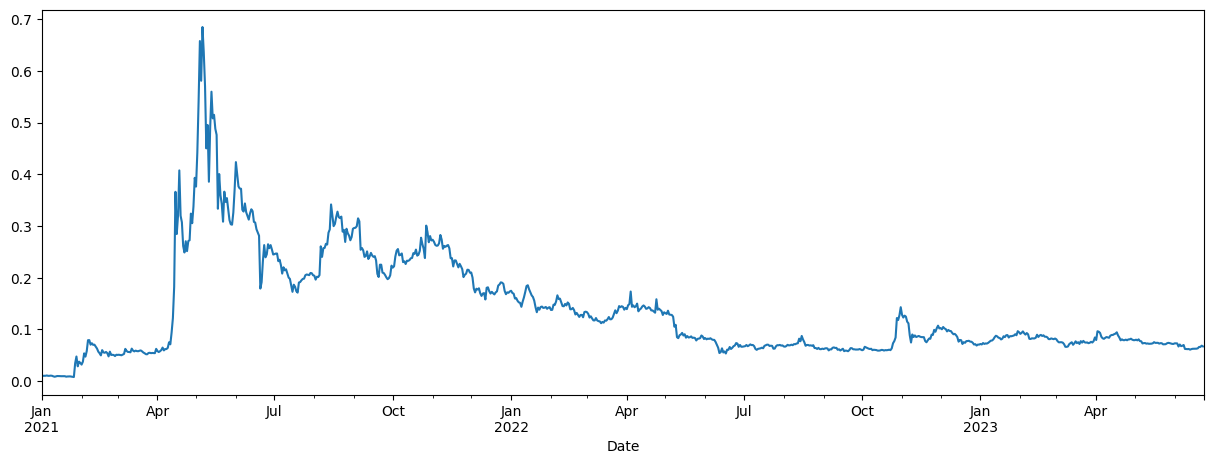

In [40]:
df['Close_Tomorrow'] = df['Close'].shift(-1)
df['Close_Tomorrow'].plot(figsize = (15,5))

In [41]:
df = df.dropna()

#Separando dados de treino e teste
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=42)
df

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100,Close_Tomorrow
Date,,,,,,,,,,
2021-04-10,0.061591,0.065068,0.060818,0.063845,0.063845,1369793118,0.060303,0.055457,0.042682,0.074649
2021-04-11,0.063749,0.079243,0.063203,0.074649,0.074649,6646627317,0.061570,0.055863,0.043372,0.070767
2021-04-12,0.074544,0.074986,0.068889,0.070767,0.070767,2687720380,0.062880,0.056158,0.043973,0.093445
2021-04-13,0.070678,0.095181,0.070678,0.093445,0.093445,7176815090,0.066644,0.056953,0.044810,0.121517
2021-04-14,0.094256,0.142510,0.092452,0.121517,0.121517,20977679327,0.073055,0.058435,0.045928,0.182207
...,...,...,...,...,...,...,...,...,...,...
2023-06-19,0.062167,0.062698,0.061696,0.062341,0.062341,149792820,0.061735,0.070797,0.075643,0.063045
2023-06-20,0.062343,0.063057,0.060911,0.063045,0.063045,190107977,0.061853,0.070482,0.075564,0.065704
2023-06-21,0.063045,0.066470,0.062965,0.065704,0.065704,370299722,0.062265,0.070220,0.075490,0.065643


In [42]:
#Apenas dados de treinamento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_features_train = scaler.fit_transform(train)

#Recriando o DF de treinamento
df_scaled_features_train = pd.DataFrame(scaled_features_train, index=train.index, columns=train.columns)

#Separando features de labels
X_train = df_scaled_features_train.drop(["Close_Tomorrow"], axis=1)
y_train = df_scaled_features_train['Close_Tomorrow']

#Modelos de Treino abaixo

#Regressão linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
linreg = model.fit(X_train , y_train)

In [43]:
#Decision Trees
#from sklearn import tree
#model = tree.DecisionTreeRegressor()
#dt = model.fit(X_train , y_train)

In [44]:
#Redes Neurais
#from sklearn.neural_network import MLPRegressor
#model = MLPRegressor(hidden_layer_sizes=(1000,1000,1000), max_iter=5000, early_stopping = True)
#rn = model.fit(X_train , y_train)

In [45]:
#DecisionTreeRegressor com AdaBoost
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.tree import DecisionTreeRegressor
#import numpy as np
#rng = np.random.RandomState(42)
#model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)
#model = model.fit(X_train, y_train)

In [46]:
#Utilizando Cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print("%0.2f precisão com um desvio padrão de %0.2f" % (scores.mean(), scores.std()))

0.96 precisão com um desvio padrão de 0.01


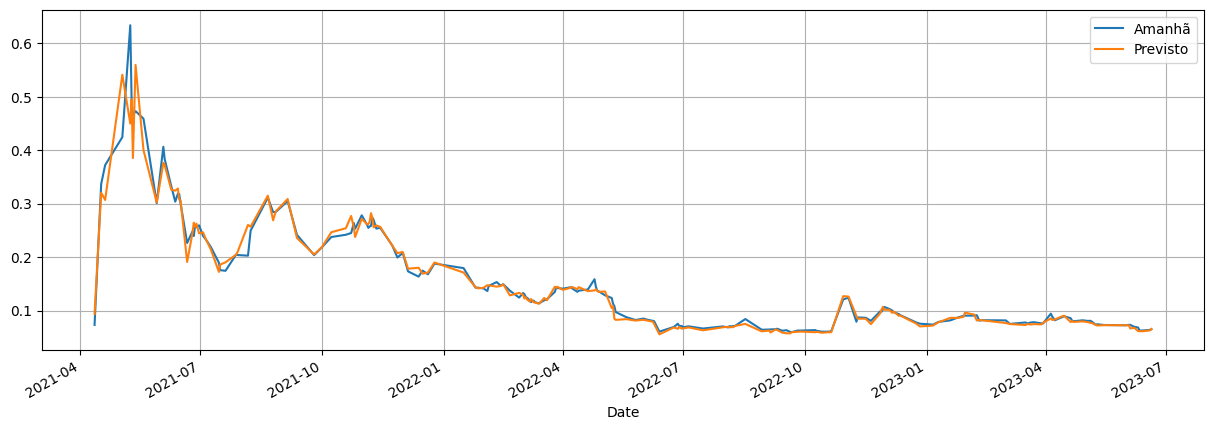

MSE: 0.003432323943819827
R² score: 0.8641056508263023


In [47]:
#Normalizando os dados de teste para prever
scaled_features_test = scaler.transform(test)
df_scaled_features_test = pd.DataFrame(scaled_features_test, index=test.index, columns=test.columns)

X_test = df_scaled_features_test.drop(["Close_Tomorrow"], axis=1)
y_test = df_scaled_features_test['Close_Tomorrow']

y_pred = model.predict(X_test)

#Adicionando o que foi previsto ao DF de teste
df_scaled_features_test['Close_Tomorrow'] = y_pred

# Desnormalizando os dados para a escala original
y_pred_norm = scaler.inverse_transform(df_scaled_features_test)
test_pred = pd.DataFrame(y_pred_norm, index=test.index, columns=test.columns)

test['Close_Pred'] = test_pred['Close_Tomorrow']
test['Close_Tomorrow'] = df['Close_Tomorrow']
test[['Close_Tomorrow','Close_Pred']]
test[['Close_Pred','Close_Tomorrow']][test.index >= '01-01-2021'].plot(figsize = (15,5))
plt.legend(['Amanhã', 'Previsto'])
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_pred, test['Close_Pred'])
r2 = r2_score(y_pred, test['Close_Pred'])

print("MSE:", mse)
print("R² score:", r2)

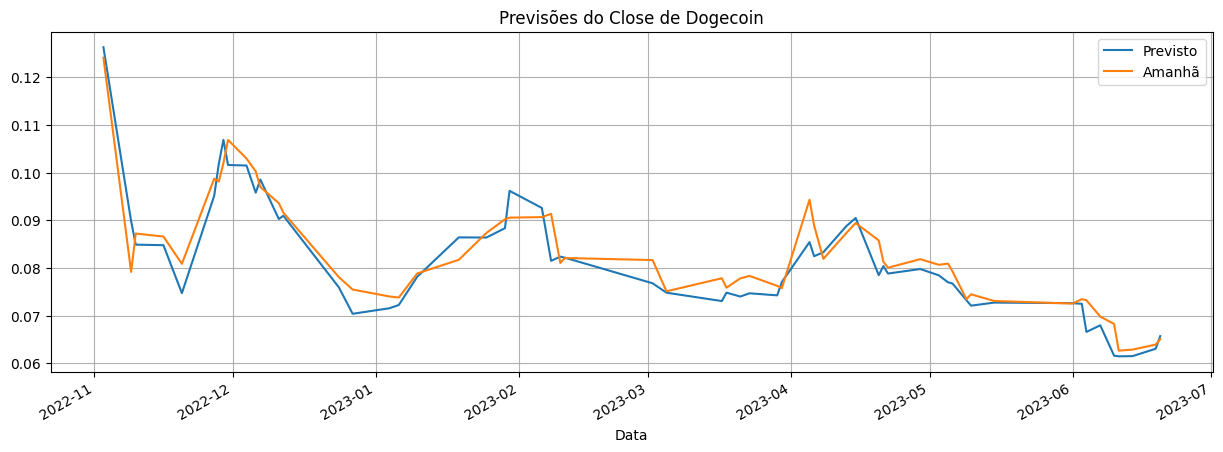

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,MA100,Close_Tomorrow,Close_Pred
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.149620,0.157114,0.139389,0.146927,0.146927,2.041742e+09,0.148347,0.149403,0.146014,0.146998,0.148664
std,0.103268,0.114814,0.087322,0.098549,0.098549,4.906646e+09,0.100773,0.093365,0.079346,0.098984,0.100653
min,0.058423,0.059526,0.053002,0.053921,0.053921,1.120492e+08,0.059299,0.056158,0.043973,0.055592,0.059738
25%,0.074071,0.076874,0.072586,0.074256,0.074256,3.907676e+08,0.074597,0.078227,0.079290,0.074354,0.075780
50%,0.110028,0.118034,0.102852,0.107669,0.107669,7.731762e+08,0.115983,0.116180,0.120941,0.105842,0.110683
75%,0.203678,0.211220,0.198114,0.204671,0.204671,1.625039e+09,0.204255,0.230323,0.224591,0.204876,0.203501
max,0.635820,0.697625,0.445034,0.570070,0.570070,4.613806e+10,0.549200,0.403328,0.319728,0.559604,0.633875


In [48]:
import matplotlib.pyplot as plt

test[['Close_Tomorrow', 'Close_Pred']][test.index >= '11-01-2022'].plot(figsize=(15, 5))
plt.title('Previsões do Close de Dogecoin')
plt.legend(['Previsto', 'Amanhã'])
plt.xlabel('Data')
plt.grid(True)
plt.show()
test.describe()

Todos modelos juntos:
* 0.95 precisão com um desvio padrão de 0.02
* MSE: 0.002997
* R² score: 0.862976

Regressão linear:
* 0.96 precisão com um desvio padrão de 0.02
* MSE: 0.003432
* R² score: 0.864105

Redes Neurais:
* 0.98 precisão com um desvio padrão de 0.01
* MSE: 0.004991
* R² score: 0.864067